/var/folders/ty/_czhy9_x7y7077n2cxz4dcr80000gn/T/ipykernel_2444/3599894509.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.median(), inplace=True)


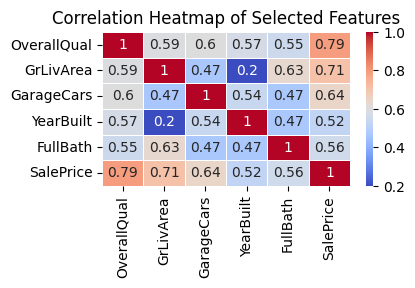

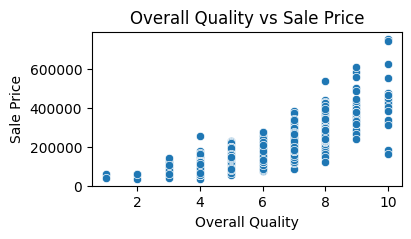

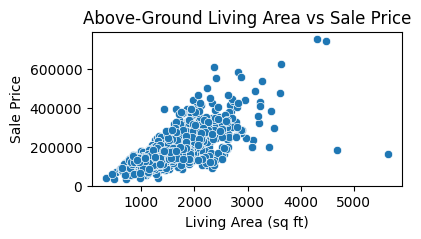

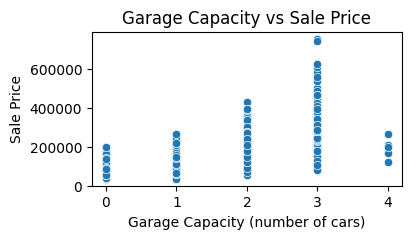

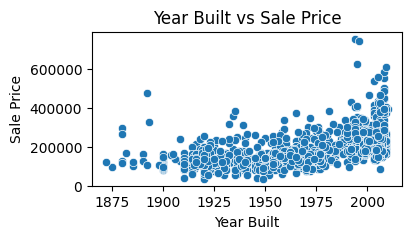

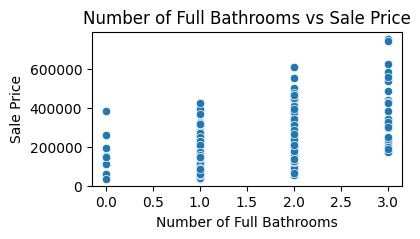

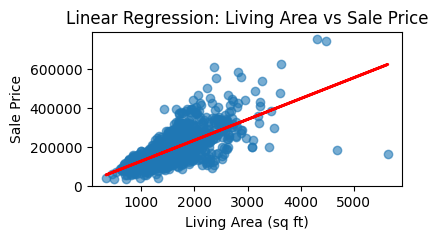

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression

# Step 1: Load the Ames Housing Dataset
ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame

# Selecting a few important features for analysis
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath']
target = 'SalePrice'
df = df[features + [target]]

# Handle missing values by filling with the median
df.fillna(df.median(), inplace=True)

# 1. Correlation Matrix
plt.figure(figsize=(4, 2))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# 2. Scatter Plots to Show Relationships
plt.figure(figsize=(4, 2))
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.title('Above-Ground Living Area vs Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x=df['GarageCars'], y=df['SalePrice'])
plt.title('Garage Capacity vs Sale Price')
plt.xlabel('Garage Capacity (number of cars)')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

plt.figure(figsize=(4, 2))
sns.scatterplot(x=df['FullBath'], y=df['SalePrice'])
plt.title('Number of Full Bathrooms vs Sale Price')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Sale Price')
plt.show()

# 3. Linear Regression Example: Fitting a Simple Linear Model for One Feature
# We'll fit a linear regression for the most correlated feature (GrLivArea)
X = df[['GrLivArea']]
y = df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the linear regression line
plt.figure(figsize=(4, 2))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.6)
plt.plot(df['GrLivArea'], y_pred, color='red', linewidth=2)  # Regression line
plt.title('Linear Regression: Living Area vs Sale Price')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# Step 2: Prepare the Data for Training
# Separate features (X) and target variable (y)
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'FullBath']]  # Selected features
y = df['SalePrice']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f'Training set shape (X_train): {X_train.shape}')
print(f'Testing set shape (X_test): {X_test.shape}')

Training set shape (X_train): (1168, 5)
Testing set shape (X_test): (292, 5)


In [6]:
from sklearn.linear_model import LinearRegression

# Step 3: Train the Linear Regression Model
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Display the model's coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef:.2f}')

# Display the intercept
print(f'Intercept: {model.intercept_:.2f}')


Model Coefficients:
OverallQual: 22457.48
GrLivArea: 58.77
GarageCars: 16871.64
YearBuilt: 429.48
FullBath: -8939.51
Intercept: -908255.25


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 4: Evaluate the Model's Performance
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1792755231.84
R² Score: 0.77


In [8]:
import numpy as np

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 42340.94


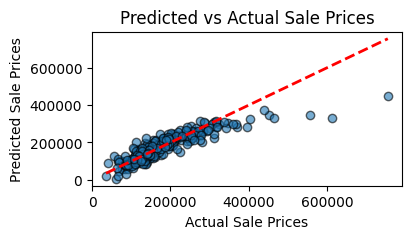

In [10]:
# Step 5: Visualize the Results
plt.figure(figsize=(4, 2))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.title('Predicted vs Actual Sale Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Perfect prediction line
plt.show()